<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/stock_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation
from google.colab import files
uploaded = files.upload()

Saving 005930.KS.csv to 005930.KS.csv


In [21]:
import io

df =pd.read_csv(io.StringIO(uploaded['005930.KS.csv'].decode('utf-8')))

print('주식데이터 확인하기')
print(df)

high_prices =df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices)/2
print('주가의 중간값:', mid_prices)

#주가 데이터에 중간 값 요소 추가하기
df['Mid'] = mid_prices # Mid 열을 새로 만들고 mid_prices데이터를 넣는다.
print(df)

#종가의 이동평균값을 계산 및 주가 데이터에 추가.
ma5 = df['Adj Close'].rolling(window=5).mean()
df['MA5'] = ma5 #MA5 열을 새로 만들고 ma5값을 넣는다.
df=df.fillna(0) #빈 값 0으로 바꾸기
print('전처리 전의 주가 데이터')
print(df)

#데이터 전처리

#Date열을 제거한다.
df= df.drop('Date', axis=1)

#데이터 스케일링(MinMaxScaler적용)
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
output= min_max_scaler.transform(df)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))

print('\n전처리 후의 주가 데이터')
print(output.head())

주식데이터 확인하기
           Date     Open     High      Low    Close  Adj Close      Volume
0    2019-10-07  48350.0  48700.0  47650.0  47750.0    47750.0   7047273.0
1    2019-10-08  47900.0  49000.0  47600.0  48900.0    48900.0  14239367.0
2    2019-10-10  48200.0  49200.0  48000.0  48550.0    48550.0  18639855.0
3    2019-10-11  49000.0  49450.0  48800.0  49150.0    49150.0   7783275.0
4    2019-10-14  50000.0  50300.0  49850.0  50000.0    50000.0  11130635.0
..          ...      ...      ...      ...      ...        ...         ...
242  2020-09-24  57700.0  58600.0  57600.0  57800.0    57800.0  17564020.0
243  2020-09-25  57700.0  58200.0  57700.0  57900.0    57900.0  11444683.0
244  2020-09-28  58300.0  58800.0  57900.0  58200.0    58200.0  12614080.0
245  2020-09-29  58300.0  59000.0  58200.0  58200.0    58200.0  15503563.0
246  2020-10-05  57500.0  59200.0  57500.0  58700.0    58700.0  19529988.0

[247 rows x 7 columns]
주가의 중간값: [48175. 48300. 48600. 49125. 50075. 50050. 50650. 50350.

In [16]:
#데이터셋 나누기
#0~60% 지점까지를 트레인셋으로 설정 (전체의 60%)
train_size = int(len(output)*0.6)
#60-90% 지점까지를 테스트셋으로 설정(전체의 30%)
test_size = int(len(output)*0.3) + train_size # + train_size 왜하는지 아직 모르겠음.

#train/test 학습 및 라벨 설정
#종가를 예측하기 위해 종가를 label로 설정
train_x = np.array(output[:train_size]) #트레인셋의 독립변수
train_y = np.array(output['Close'][:train_size]) #트레인셋의 종속변수
test_x = np.array(output[train_size: test_size]) #테스트셋의 독립변수
test_y = np.array(output['Close'][train_size:test_size]) #테스트셋의 종속변수
validation_x = np.array(output[test_size:]) #트레인셋의 독립변수
validation_y = np.array(output['Close'][test_size:])

print('분할 전 전체 데이터의 길이 : %s' % len(output))
print('학습 데이터의 길이: %s' % len(train_x))
print('테스트 데이터의 길이: %s' % len(test_x))
print('검증용 데이터의 길이: %s' % len(validation_x))

분할 전 전체 데이터의 길이 : 247
학습 데이터의 길이: 148
테스트 데이터의 길이: 74
검증용 데이터의 길이: 25


Keras를 이용한 딥러닝, (deeplearnig using Keras.)

In [22]:
model = Sequential() # keras모델 생성

#keras 딥러닝 모델 학습을 위한 파라미터(옵션값)을 설정
learnig_rate = 0.01
training_cnt = 1000
batch_size =100
input_size =8

#생성된 딥러닝 모델에 학습용 데이터를 넣기 (train_x)
model.add(Dense(units = input_size, activation='tanh', input_shape=(train_x.shape[1],)))
model.add(Dense(units = input_size*3, activation='tanh'))
model.add(Dense(units=1, activation='tanh'))

#데이터 학습을 진행
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mape', 'acc'])
model.summary()

history = model.fit(train_x, train_y, epochs=training_cnt,
                    batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape, val_acc = model.evaluate(test_x, test_y, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - mae: 0.0509 - mape: 5.8248 - acc: 0.0135
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0509 - mape: 8424.3379 - acc: 0.0135
Epoch 3/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0508 - mape: 12495.7021 - acc: 0.0135
Epoch 4/1000


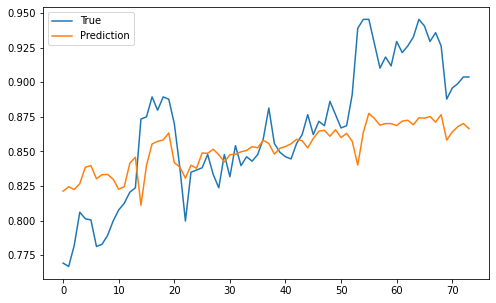

In [20]:
#학습된 모델로부터 테스트 데이터를 예측하기.
pred = model.predict(test_x)

fig = plt.figure(facecolor='white', figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(test_y, label='True') #실제 주가
ax.plot(pred, label='Prediction') #만든 딥러닝 모델이 예측한 주가
ax.legend()

#현재까지 그려진 그래프를 시각화
plt.savefig("plot.png")
